# **Data Wrangling, Exploratory Data Analysis, and Vizualization**

# **A. Data Wrangling**

In [2]:
#Import Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring Warning during trainings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Initialize an empty list for the list of chunks created from the dataset.
all_chunks = []

#import the dataset and break it into chunks of 500,000
data = pd.read_csv('/content/drive/MyDrive/NUTRITION2001_2022.zip', chunksize=500000)

for chunk in data:
    # Extract the needed columns
    cols_to_extract = ['REF_AREA:Geographic area', 'TIME_PERIOD:Time period', 'INDICATOR:Indicator',
                    'RESIDENCE:Residence', 'WEALTH_QUINTILE:Wealth Quintile', 'MATERNAL_EDU_LVL:Mother\'s Education Level', 'OBS_VALUE:Observation Value']
    chunk = chunk[cols_to_extract]

    # Rename columns
    chunk = chunk.rename(columns={'REF_AREA:Geographic area':'Country'
                                ,'TIME_PERIOD:Time period':'Year'
                                ,'INDICATOR:Indicator':'Indicator'
                                ,'RESIDENCE:Residence':'Residence'
                                ,'WEALTH_QUINTILE:Wealth Quintile':'Poverty_Rating'
                                ,'MATERNAL_EDU_LVL:Mother\'s Education Level':'Maternal_Education'
                                ,'OBS_VALUE:Observation Value':'Observation_Value'})

    # Clean up values - remove colons and values before it
    chunk['Country'] = chunk['Country'].apply(lambda x:x[x.index(':')+1:])
    chunk['Indicator'] = chunk['Indicator'].apply(lambda x:x[x.index(':')+1:])
    chunk['Residence'] = chunk['Residence'].apply(lambda x:x[x.index(':')+1:])
    chunk['Poverty_Rating'] = chunk['Poverty_Rating'].apply(lambda x:x[x.index(':')+1:])
    chunk['Maternal_Education'] = chunk['Maternal_Education'].apply(lambda x:x[x.index(':')+1:])

    chunk = chunk[~chunk['Year'].str.contains('-', na=False)]

    all_chunks.append(chunk)

df = pd.concat(all_chunks)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2177962 entries, 0 to 2398605
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Country             object 
 1   Year                object 
 2   Indicator           object 
 3   Residence           object 
 4   Poverty_Rating      object 
 5   Maternal_Education  object 
 6   Observation_Value   float64
dtypes: float64(1), object(6)
memory usage: 132.9+ MB


## **Observations.**

*   `Country` column is of Object(String) Datatype.
*   `Year` column is of Object(String) Datatype. We will convert it to Date format DD-MM-YYYY later.
*   `Indicator` column is of Object(String) Datatype.
*   `Residence` column is of Object(String) Datatype.
*   `Maternal_Education` column is of Object(String) Datatype.
*   `Poverty_Rating` column is of Object(String) Datatype.
*   `Observation_value` column is of Float(Number) Datatype.















### **Extract Only Numbers from Dataset**

In [6]:
#Extract Numbers Observation_value from the dataframe

df.select_dtypes("number").head()

,Observation_Value
0,78.9
1,77.9
2,78.8
3,86.1
4,75.1


In [7]:
df.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value
0,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Total,Total,78.9
1,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Total,Total,77.9
2,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Total,Total,78.8
3,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Lowest,Total,86.1
4,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Second,Total,75.1


### **Extract Only Strings from Dataset**

In [8]:
#Extracting only the categorical variables from the dataframe
df.select_dtypes("object").head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education
0,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Total,Total
1,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Total,Total
2,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Total,Total
3,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Lowest,Total
4,Afghanistan,2015,Continued breastfeeding (12-15 months),Total,Second,Total


In [9]:
# Check unique categories in the 'Country' column
df['Country'].unique()

array([' Afghanistan', ' Angola', ' Albania', ' Argentina', ' Armenia',
       ' Australia', ' Azerbaijan', ' Burundi', ' Benin', ' Burkina Faso',
       ' Bangladesh', ' Bosnia and Herzegovina', ' Belarus', ' Belize',
       ' Bolivia (Plurinational State of)', ' Brazil', ' Barbados',
       ' Bhutan', ' Botswana', ' Central African Republic', ' China',
       " Côte d'Ivoire", ' Cameroon', ' Democratic Republic of the Congo',
       ' Congo', ' Colombia', ' Comoros', ' Cabo Verde', ' Costa Rica',
       ' Cuba', ' Djibouti', ' Dominican Republic', ' Algeria',
       ' Ecuador', ' Egypt', ' Eritrea', ' Ethiopia', ' Fiji', ' Gabon',
       ' Georgia', ' Ghana', ' Guinea', ' Gambia', ' Guinea-Bissau',
       ' Equatorial Guinea', ' Guatemala', ' Guyana', ' Honduras',
       ' Haiti', ' Indonesia', ' India', ' Iran (Islamic Republic of)',
       ' Iraq', ' Jamaica', ' Jordan', ' Kazakhstan', ' Kenya',
       ' Kyrgyzstan', ' Cambodia', ' Kiribati',
       " Lao People's Democratic Republ

### Observations
Country column contains several countries including Africans.Since our reseach interest is streamlined to African Countries.We shall Extract only African countries and put them in regions

In [10]:
# Check unique categories in the 'indicator' column
df['Indicator'].unique()


array([' Continued breastfeeding (12-15 months)',
       ' Continued breastfeeding (12-23 months)',
       ' Continued breastfeeding (20-23 months)',
       ' Ever breastfed (0-23 months)',
       ' Exclusive breastfeeding (0-5 months)',
       ' Exclusively Breastfed for the First Two Days After Birth',
       ' Mixed Milk Feeding (0-5 months)',
       ' Predominantly breastfeeding (children aged 0 to 5 months)',
       ' Egg and/or flesh foods consumption (6-23months)',
       ' Food group- Breastmilk (6-23months)',
       ' Food group- Dairy (milk, infant formula, yogurt, cheese) (6-23months)',
       ' Food group- Eggs (6-23months)',
       ' Food group- Flesh foods (meat, poultry, fish and organ meats) (6-23months)',
       ' Food group- Grains, roots, tubers and plantains (6-23months)',
       ' Introduction to solid, semi-solid foods (6-8 months)',
       ' Food group- Pulses (beans, peas, lentils), nuts and seeds (6-23months)',
       ' Minimum acceptable diet (children aged 6-

### Observation
We need few of the indicators among several categories.We shall list out the indicators of interest later

In [11]:
#remove white spaces between the categories of Country and Indicators columns
df['Country'] = df['Country'].str.strip()
df['Indicator'] = df['Indicator'].str.strip()

In [12]:
# List out only indicators of interest
indicators_intrst = ['Ever breastfed (0-23 months)', 'Height-for-age <-2 SD (stunting)'
                     , 'Introduction to solid, semi-solid foods (6-8 months)', 'Mean BMI-for-age'
                     , 'Minimum meal frequency (children aged 6 to 23 months)'
                     , 'Weight-for-age <-2 SD (Underweight)', 'Weight-for-height <-2 SD (wasting)'
                     , 'Weight-for-height <-3 SD (severe wasting)', 'Weight-for-height >+2 SD (overweight)']

In [13]:
#  List out only African Countries of interest
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde',
			'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Ivory Coast', 'Djibouti',
			'Democratic Republic of the Congo', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
			'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
			'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
			'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Republic of the Congo', 'Rwanda',
			'Sao Tome & Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
			'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']

In [14]:
# Filter the dataset based on indicator of interest and African Countries
mask = df['Indicator'].isin(indicators_intrst)
ind_df = df[mask]

mask = ind_df['Country'].isin(african_countries)
nutri_africa = ind_df[mask]

In [15]:
# Include African countries in the list of regions they belong to
West_Africa = ['Benin', 'Burkina Faso', 'Ivory Coast','Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
              'Liberia', 'Mali', 'Mauritania',  'Niger', 'Nigeria','Senegal','Sierra Leone',
              'Togo']

South_africa = ['Botswana', 'Eswatini', 'Lesotho', 'Namibia','South Africa', 'Zambia','Zimbabwe' ]

East_Africa = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya','Madagascar',
              'Malawi', 'Mauritius','Mozambique', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan',
              'Sudan', 'Tanzania','Uganda']

North_Africa = ['Algeria','Egypt','Libya', 'Morocco', 'Tunisia']

Central_Africa = ['Angola','Cameroon', 'Central African Republic', 'Chad', 'Democratic Republic of the Congo',
                 'Equatorial Guinea','Gabon', 'Republic of the Congo', 'Sao Tome & Principe']

In [16]:
# Group African countries into regions
def map_to_region(country):
    if country in West_Africa:
        return 'West Africa'
    elif country in South_africa:
        return 'South Africa'
    elif country in East_Africa:
        return 'East Africa'
    elif country in North_Africa:
        return 'North Africa'
    else:
        return 'Central Africa'

nutri_africa['Region'] = nutri_africa['Country'].apply(map_to_region)

In [17]:
nutri_africa.shape

(104480, 8)

In [18]:
nutri_africa.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value,Region
680,Angola,2015,Ever breastfed (0-23 months),Total,Total,Total,95.8,Central Africa
681,Angola,2015,Ever breastfed (0-23 months),Total,Total,Total,94.1,Central Africa
682,Angola,2015,Ever breastfed (0-23 months),Rural,Bottom 20%,Total,94.0,Central Africa
683,Angola,2015,Ever breastfed (0-23 months),Urban,Bottom 20%,Total,90.2,Central Africa
684,Angola,2015,Ever breastfed (0-23 months),Rural,Bottom 40%,Total,93.4,Central Africa


In [19]:
# Check unique categories in the 'residence' column
nutri_africa['Residence'].unique()

array([' Total', ' Rural', ' Urban'], dtype=object)

In [20]:
#Replace Total category with Suburban in Residence column
nutri_africa['Residence'] = nutri_africa['Residence'].str.strip().replace('Total', 'Suburban')
nutri_africa['Residence'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [21]:
# Check unique categories in the 'Maternal_Education' column
nutri_africa['Maternal_Education'].unique()

array([' Total', ' None and Primary',
       ' Secondary education (lower and upper secondary education)',
       ' Secondary and Higher', ' Tertiary education',
       ' Never attended an education programme / No schooling',
       ' Primary education'], dtype=object)

In [22]:
#Re-name the categories in the Maternal_Education Column
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('None and Primary', 'Primary education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Secondary and Higher','Secondary education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Secondary education (lower and upper secondary education)', 'Secondary education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Never attended an education programme / No schooling','No education')
nutri_africa['Maternal_Education'] = nutri_africa['Maternal_Education'].str.strip().replace('Total','No education')

In [23]:
#Check the count of each categories in Maternal_Education
nutri_africa['Maternal_Education'].value_counts()

No education           99593
Primary education       2199
Secondary education     2010
Tertiary education       678
Name: Maternal_Education, dtype: int64

In [24]:
# Check unique categories in the 'Poverty_Rating' column
nutri_africa['Poverty_Rating'].unique()

array([' Total', ' Bottom 20%', ' Bottom 40%', ' Bottom 60%',
       ' Bottom 80%', ' Lowest', ' Second', ' Middle', ' Fourth',
       ' Highest', ' Richest 20%', ' Richest 40%', ' Richest 60%',
       ' Richest 80%'], dtype=object)

In [25]:
#Re-name the categories in the Poverty_Rating Column
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Total','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Lowest','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Second','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Middle','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Fourth','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Highest','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 20%','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 40%','Poor')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 60%','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Bottom 80%','Middle class')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 20%','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 40%','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 60%','Rich')
nutri_africa['Poverty_Rating'] = nutri_africa['Poverty_Rating'].str.strip().replace('Richest 80%','Rich')

In [26]:
#Check the count of each categories in Poverty_Rating
nutri_africa['Poverty_Rating'].value_counts()

Poor            85444
Rich             9753
Middle class     9283
Name: Poverty_Rating, dtype: int64

In [27]:
nutri_africa.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value,Region
680,Angola,2015,Ever breastfed (0-23 months),Suburban,Poor,No education,95.8,Central Africa
681,Angola,2015,Ever breastfed (0-23 months),Suburban,Poor,No education,94.1,Central Africa
682,Angola,2015,Ever breastfed (0-23 months),Rural,Poor,No education,94.0,Central Africa
683,Angola,2015,Ever breastfed (0-23 months),Urban,Poor,No education,90.2,Central Africa
684,Angola,2015,Ever breastfed (0-23 months),Rural,Poor,No education,93.4,Central Africa


In [28]:
nutri_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104480 entries, 680 to 2393090
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             104480 non-null  object 
 1   Year                104480 non-null  object 
 2   Indicator           104480 non-null  object 
 3   Residence           104480 non-null  object 
 4   Poverty_Rating      104480 non-null  object 
 5   Maternal_Education  104480 non-null  object 
 6   Observation_Value   104480 non-null  float64
 7   Region              104480 non-null  object 
dtypes: float64(1), object(7)
memory usage: 7.2+ MB


## **Exploratory Data Analysis and Vizualizations**

### **Univariate Data Analysis**
Here we shall carry out univarate analysis of the

1.   Numeric Variable `Observation_Value`
2.   Categorical Variable `Country`
3.   Categorical Variable `Region`
2.   Categorical Variable `Residence`
1.   Categorical Variable `Poverty_Rating`
2.   Categorical Variable `Maternal_Education`









### **Bivariate Data Analysis**
Here we shall carry out univarate analysis of the

1.   Categorical Variable `Country` against Categorical Variable `Indicator`
3.   Categorical Variable `Region`  against Categorical Variable `Indicator`
2.   Categorical Variable `Maternal_Education` against Categorical Variable `Indicator`

In [29]:
# Country against indicators
nutri_africa['Indicator'].value_counts()

Height-for-age <-2 SD (stunting)                         16391
Weight-for-height >+2 SD (overweight)                    16107
Mean BMI-for-age                                         15997
Weight-for-age <-2 SD (Underweight)                      15278
Weight-for-height <-2 SD (wasting)                       15249
Weight-for-height <-3 SD (severe wasting)                15248
Ever breastfed (0-23 months)                              5435
Minimum meal frequency (children aged 6 to 23 months)     2765
Introduction to solid, semi-solid foods (6-8 months)      2010
Name: Indicator, dtype: int64

**MODEL** **BUILDING**


In [30]:
nutri_afri = nutri_africa.copy()

In [31]:
nutri_afri.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value,Region
680,Angola,2015,Ever breastfed (0-23 months),Suburban,Poor,No education,95.8,Central Africa
681,Angola,2015,Ever breastfed (0-23 months),Suburban,Poor,No education,94.1,Central Africa
682,Angola,2015,Ever breastfed (0-23 months),Rural,Poor,No education,94.0,Central Africa
683,Angola,2015,Ever breastfed (0-23 months),Urban,Poor,No education,90.2,Central Africa
684,Angola,2015,Ever breastfed (0-23 months),Rural,Poor,No education,93.4,Central Africa


In [32]:
nutri_afri['Country'].unique()

array(['Angola', 'Burundi', 'Benin', 'Burkina Faso', 'Botswana',
       'Central African Republic', 'Cameroon',
       'Democratic Republic of the Congo', 'Comoros', 'Cabo Verde',
       'Djibouti', 'Algeria', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Kenya', 'Liberia',
       'Lesotho', 'Morocco', 'Madagascar', 'Mali', 'Mozambique',
       'Mauritania', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
       'Sudan', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan',
       'Eswatini', 'Chad', 'Togo', 'Tunisia', 'Uganda', 'South Africa',
       'Zambia', 'Zimbabwe', 'Equatorial Guinea', 'Libya', 'Seychelles'],
      dtype=object)

In [33]:
nutri_afri['Country'].replace(nutri_afri['Country'].unique(),
                        range(0,len(nutri_afri['Country'].unique())), inplace=True)

In [34]:
nutri_afri['Year'].unique()

array(['2015', '2007', '2010', '2016', '2019', '2001', '2006', '2012',
       '2018', '2014', '2003', '2013', '2017', '2004', '2011', '2005',
       '2008', '2002', 2005, 2011, 2016, 2019, 2012, 2003, 2008, 2014,
       2017, 2006, 2018, 2013, 2020, 2010, 2007, 2004, 2009, '2009', 2002,
       2015, 2022, 2001, '2020', '2021', 2021, '2022'], dtype=object)

In [35]:
nutri_afri['Year'].replace(['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace=True)

In [36]:
nutri_afri['Year'].unique()

array([  14,    6,    9,   15,   18,    0,    5,   11,   17,   13,    2,
         12,   16,    3,   10,    4,    7,    1, 2005, 2011, 2016, 2019,
       2012, 2003, 2008, 2014, 2017, 2006, 2018, 2013, 2020, 2010, 2007,
       2004, 2009,    8, 2002, 2015, 2022, 2001,   19,   20, 2021,   21])

In [37]:
nutri_afri['Year'].replace([2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16,17,18,19,20,21], inplace=True)

In [38]:
nutri_afri['Year'].unique()

array([14,  6,  9, 15, 18,  0,  5, 11, 17, 13,  2, 12, 16,  3, 10,  4,  7,
        1, 19,  8, 21, 20])

In [39]:
nutri_afri['Indicator'].unique()

array(['Ever breastfed (0-23 months)',
       'Introduction to solid, semi-solid foods (6-8 months)',
       'Minimum meal frequency (children aged 6 to 23 months)',
       'Mean BMI-for-age', 'Height-for-age <-2 SD (stunting)',
       'Weight-for-age <-2 SD (Underweight)',
       'Weight-for-height <-2 SD (wasting)',
       'Weight-for-height <-3 SD (severe wasting)',
       'Weight-for-height >+2 SD (overweight)'], dtype=object)

In [40]:
nutri_afri['Indicator'].replace(['Ever breastfed (0-23 months)',
       'Introduction to solid, semi-solid foods (6-8 months)',
       'Minimum meal frequency (children aged 6 to 23 months)',
       'Mean BMI-for-age', 'Height-for-age <-2 SD (stunting)',
       'Weight-for-age <-2 SD (Underweight)',
       'Weight-for-height <-2 SD (wasting)',
       'Weight-for-height <-3 SD (severe wasting)',
       'Weight-for-height >+2 SD (overweight)'],
                        [0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True)

In [41]:
nutri_afri['Residence'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [42]:
nutri_afri['Residence'].replace([ 'Rural','Suburban', 'Urban'],
                        [0, 1, 2], inplace=True)

In [43]:
nutri_afri['Poverty_Rating'].unique()

array(['Poor', 'Middle class', 'Rich'], dtype=object)

In [44]:
nutri_afri['Poverty_Rating'].replace(['Poor', 'Middle class', 'Rich'],
                        [0, 1, 2], inplace=True)

In [45]:
nutri_afri['Maternal_Education'].unique()

array(['No education', 'Primary education', 'Secondary education',
       'Tertiary education'], dtype=object)

In [46]:
nutri_afri['Maternal_Education'].replace(['No education', 'Primary education', 'Secondary education','Tertiary education'],
                        [0, 1, 2, 3], inplace=True)

In [47]:
nutri_afri['Region'].unique()

array(['Central Africa', 'East Africa', 'West Africa', 'South Africa',
       'North Africa'], dtype=object)

In [48]:
nutri_afri['Region'].replace(['Central Africa', 'East Africa', 'West Africa', 'South Africa','North Africa'],
                        [0, 1, 2, 3, 4], inplace=True)

In [49]:
nutri_afri.head()

,Country,Year,Indicator,Residence,Poverty_Rating,Maternal_Education,Observation_Value,Region
680,0,14,0,1,0,0,95.8,0
681,0,14,0,1,0,0,94.1,0
682,0,14,0,0,0,0,94.0,0
683,0,14,0,2,0,0,90.2,0
684,0,14,0,0,0,0,93.4,0


In [50]:
nutri_afri.shape

(104480, 8)

In [51]:
X = nutri_afri[['Country','Year','Indicator','Residence','Poverty_Rating','Maternal_Education','Region']]
y = nutri_afri['Observation_Value']

In [52]:
#Feature Selection
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k = 7)
fit = selector.fit_transform(X, y)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

           Feat_names      F_Scores
2           Indicator  78674.166508
4      Poverty_Rating   1351.567364
5  Maternal_Education   1062.451892
1                Year    255.390580
6              Region    198.643451
3           Residence     26.080063
0             Country      0.876217


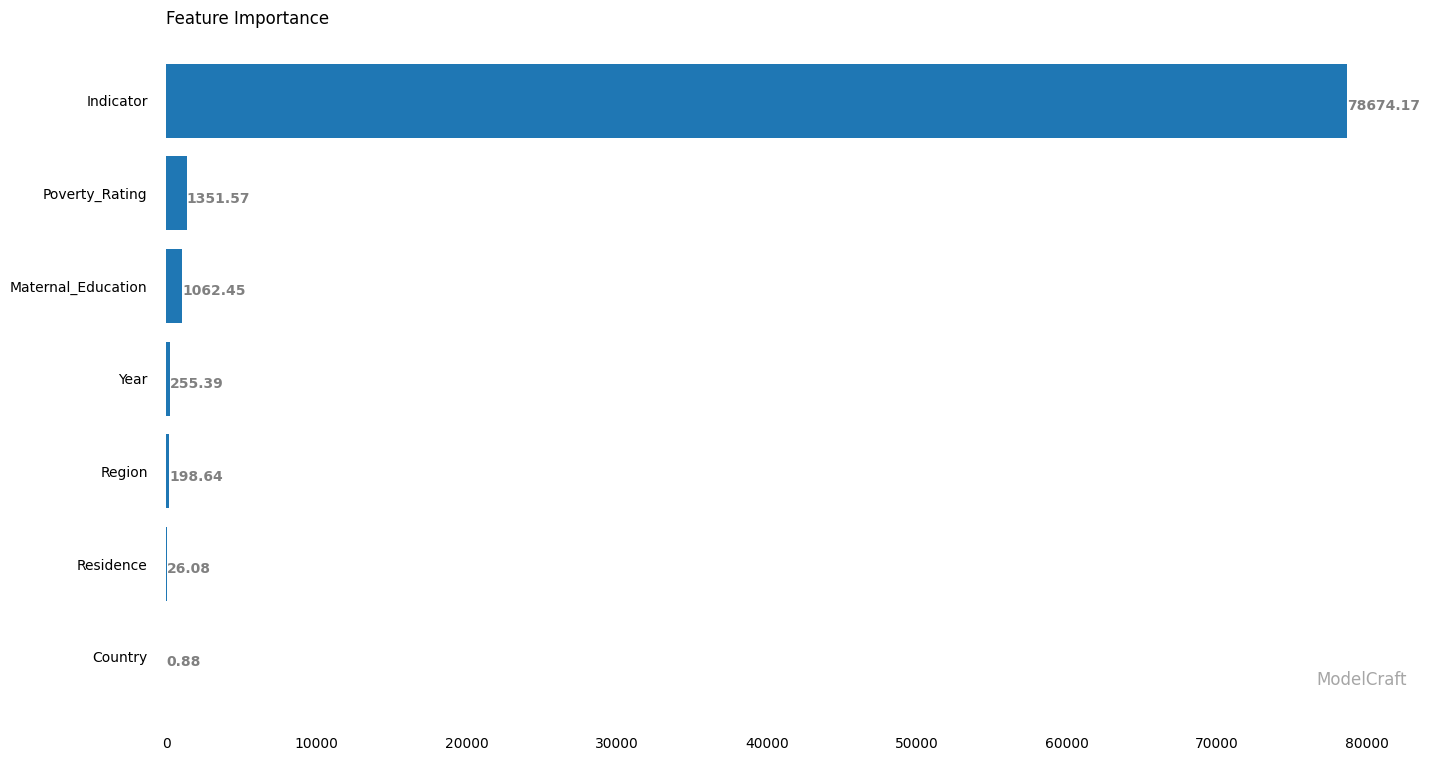

In [53]:
import pandas as pd
from matplotlib import pyplot as plt



feature = list(ns_df_sorted['Feat_names'].values)
score = list(ns_df_sorted['F_Scores'].values)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(feature, score)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)


# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Feature Importance',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'ModelCraft', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [55]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR())
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [56]:
pred = regr.predict(X_test)
# y_pred_test = [float(i[0]) for i in pred]

from sklearn.metrics import mean_squared_error
from scipy import stats
# test_label = [float(i) for i in y_test]


print('Mean squared error (MSE):', mean_squared_error(y_test, pred))

print('Root mean squared error (RMSE):', np.sqrt(mean_squared_error(y_test, pred)))


pearson = stats.pearsonr(y_test, pred)
print('pearson coefficient:',pearson)
print('=================================================')

print('======================================================')
spearman = stats.spearmanr(y_test, pred)
print('spearman coefficient:',spearman)
print('================================')

from sklearn.metrics import mean_absolute_error

print("MAE: ",mean_absolute_error(y_test, pred))

from sklearn.metrics import r2_score

print("r2 score: ",r2_score(y_test, pred))

Mean squared error (MSE): 198.2125495207172
Root mean squared error (RMSE): 14.078797872003035
pearson coefficient: PearsonRResult(statistic=0.825881133306648, pvalue=0.0)
spearman coefficient: SignificanceResult(statistic=0.37783477315947184, pvalue=0.0)
MAE:  9.518530333361095
r2 score:  0.6819679393365288


In [57]:
Xn = nutri_afri[['Indicator','Poverty_Rating','Maternal_Education']]
yn = nutri_afri['Observation_Value']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( Xn, yn, test_size=0.20, random_state=42)

In [58]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR())
regr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [59]:
pred = regr.predict(X_test)
# y_pred_test = [float(i[0]) for i in pred]

from sklearn.metrics import mean_squared_error
from scipy import stats
# test_label = [float(i) for i in y_test]


print('Mean squared error (MSE):', mean_squared_error(y_test, pred))

print('Root mean squared error (RMSE):', np.sqrt(mean_squared_error(y_test, pred)))


pearson = stats.pearsonr(y_test, pred)
print('pearson coefficient:',pearson)
print('=================================================')

print('======================================================')
spearman = stats.spearmanr(y_test, pred)
print('spearman coefficient:',spearman)
print('================================')

from sklearn.metrics import mean_absolute_error

print("MAE: ",mean_absolute_error(y_test, pred))

from sklearn.metrics import r2_score

print("r2 score: ",r2_score(y_test, pred))

Mean squared error (MSE): 167.02705744607988
Root mean squared error (RMSE): 12.923894824938799
pearson coefficient: PearsonRResult(statistic=0.8702155569901863, pvalue=0.0)
spearman coefficient: SignificanceResult(statistic=0.8141349462228776, pvalue=0.0)
MAE:  7.302115424326759
r2 score:  0.7320050652969343
